# Lista de Exercicios

### Limpeza Inicial

Exercício 1: Removendo Espaços Extras e Padronizando Nomes

Você recebeu um conjunto de dados com nomes de clientes escritos de forma inconsistente, contendo espaços extras e diferentes capitalizações.
Escreva um código para limpar esses nomes, removendo os espaços em branco no início e no final e padronizando-os para a primeira letra maiúscula e o restante minúsculo.

In [4]:
import pandas as pd

dados = {'Nome': ['Ana', 'Bru nO ', 'Carlos', 'DaieLA']}
df = pd.DataFrame(dados)

df['Nome'] = df['Nome'].str.strip().str.capitalize()
df

,Nome
0,Ana
1,Bru no
2,Carlos
3,Daiela


Exercício 2: Removendo Caracteres Especiais e Convertendo Números

Você tem um dataset onde os preços dos produtos foram registrados com um símbolo de moeda.
Remova os caracteres não numéricos e converta os valores para o tipo correto.

In [6]:
dados = {'Salario': ['3000', '4000R$', '5000', '3000', '4000R$']}
df = pd.DataFrame(dados)

df['Salario'] = df['Salario'].str.extract('(\d+)').astype(float)
df

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\50749314877\AppData\Local\Temp\ipykernel_17396\1611022377.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['Salario'] = df['Salario'].str.extract('(\d+)').astype(float)


,Salario
0,3000.0
1,4000.0
2,5000.0
3,3000.0
4,4000.0


Exercício 3: Removendo Duplicatas

Em um dataset de clientes, alguns registros aparecem duplicados.
Remova os registros repetidos e exiba o DataFrame atualizado.

In [7]:
dados = {'Nome': ['Ana', 'Bruno ', 'ana', 'Bruno', 'carlos', 'Carlos']}

df = pd.DataFrame(dados)
df['Nome'] = df['Nome'].str.strip().str.capitalize()
df = df.drop_duplicates()

df

,Nome
0,Ana
1,Bruno
4,Carlos


Exercício 4: Convertendo Tipos de Dados

Uma coluna de idades foi armazenada erroneamente como texto.
Converta essa coluna para tipo numérico.

In [11]:
dados = {'Idades': ['20', '30', '40', '8', '10']}

df = pd.DataFrame(dados)
df = df['Idades'].astype(int)

df.dtypes

dtype('int32')

Exercício 5: Padronizando Formato de Datas

Um dataset contém datas em diferentes formatos.
Padronize todas as datas para o formato YYYY-MM-DD.

In [29]:
dados = {'datas': ['9/3/2004', '3/6/2020']}

df = pd.DataFrame(dados)

df['datas'] = pd.to_datetime(df['datas'], format='%m/%d/%Y')
df

,datas
0,2004-09-03
1,2020-03-06


### Tratamento de Outliers

Exercício 1: Identificando Outliers com Boxplot

Gere um conjunto de dados e utilize um boxplot para visualizar possíveis outliers.

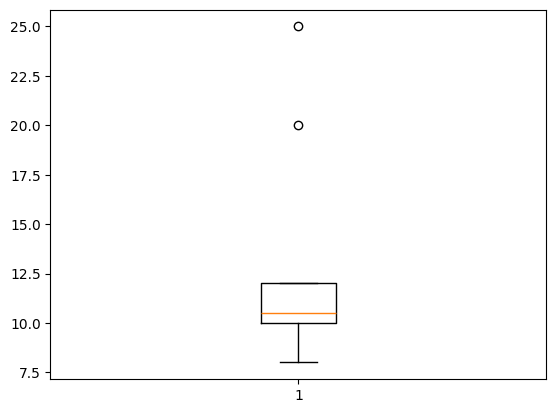

In [33]:
import numpy as np
import matplotlib.pyplot as plt

dados = np.array([10, 12, 11, 10, 20, 9, 8, 10, 25, 12])

plt.boxplot(dados)
plt.show()

Exercício 2: Removendo Outliers Utilizando o IQR

Detecte e remova os outliers utilizando a técnica do intervalo interquartil (IQR).

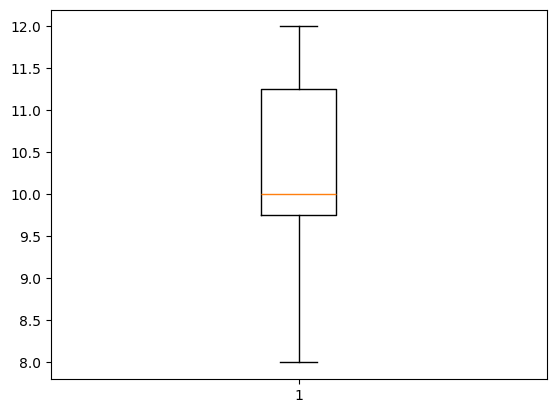

In [39]:
import numpy as np
import matplotlib.pyplot as plt

dados = np.array([10, 12, 11, 10, 20, 9, 8, 10, 25, 12])
Q1 = np.percentile(dados, 25)
Q3 = np.percentile(dados, 75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

dados_filtrados = dados[(dados >= limite_inferior) & (dados <= limite_superior)]

plt.boxplot(dados_filtrados)
plt.show()

Exercício 3: Substituindo Outliers pela Mediana

Ao invés de remover os outliers, substitua-os pela mediana dos dados.

In [50]:
import numpy as np
import matplotlib.pyplot as plt

dados = {'Idade': [10, 15, 12, 13, 14, 50, 20000000, 10, 18, 16, 2656646468486]}
df = pd.DataFrame(dados)

Q1 = df['Idade'].quantile(0.25)
Q3 = df['Idade'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR



outliers = (df['Idade'] < limite_inferior) | (df['Idade'] > limite_superior)

mediana = df['Idade'].median()
df.loc[outliers, 'Idade'] = mediana
df

,Idade
0,10
1,15
2,12
3,13
4,14
5,50
6,15
7,10
8,18
9,16


Exercício 4: Detectando Outliers com Z-Score

Utilize o Z-Score para identificar outliers.

In [85]:
from scipy.stats import zscore


dados_limpos = np.random.normal(loc=50, scale=10, size=100)
ruidos = np.random.uniform(low=100, high=200, size=5)
dados_com_ruido = np.concatenate([dados_limpos, ruidos])
df = pd.DataFrame(dados_com_ruido, columns=["Valores"])

def detectar_outliers_zscore(dados, limiar=3):
    z_scores = np.abs(zscore(dados))
    return dados[z_scores > limiar]
                                             
outliers = detectar_outliers_zscore(df["Valores"]) 
outliers.tolist()
                                     

[123.30329553529484,
 120.18831182212895,
 124.96345827269018,
 111.40999658452586,
 161.63644718601617]

Exercício 5: Aplicando Log Transform para Reduzir Impacto de Outliers

Transforme os dados utilizando logaritmo para reduzir o impacto dos outliers.

In [88]:
import numpy as np
import pandas as pd

dados = {'Idade': [10, 15, 12, 13, 14, 50, 20000000, 10, 18, 16, 2656646468486]}
df = pd.DataFrame(dados)

df['Idade_Log'] = np.log1p(df['Idade'])
print(df)

            Idade  Idade_Log
0              10   2.397895
1              15   2.772589
2              12   2.564949
3              13   2.639057
4              14   2.708050
5              50   3.931826
6        20000000  16.811243
7              10   2.397895
8              18   2.944439
9              16   2.833213
10  2656646468486  28.608086


### Tratamento com Valores Ausentes

Exercício 1: Identificando Valores Ausentes

Crie um DataFrame e identifique os valores ausentes.

In [ ]:
import pandas as pd
import numpy as np

dados = {
    'Nome': ['Alice', 'Bob', np.nan, 'David', 'Emma'],
    'Idade': [25, np.nan, 30, 22, np.nan]}

df = pd.DataFrame(dados)

df.isnull().sum()

Nome     1
Idade    2
dtype: int64

Exercício 2: Removendo Valores Ausentes

Remova os registros que possuem valores ausentes.

In [95]:
import pandas as pd
import numpy as np

# Criando um DataFrame com valores ausentes
dados = {
    'Nome': ['Alice', 'Bob', np.nan, 'David', 'Emma'],
    'Idade': [25, np.nan, 30, 22, np.nan]}

df = pd.DataFrame(dados)

df.dropna()

,Nome,Idade
0,Alice,25.0
3,David,22.0


Exercício 3: Substituindo Valores Ausentes pela Média

Preencha os valores ausentes com a média da coluna.

In [103]:
import pandas as pd
import numpy as np

dados = {
    'Nome': ['Alice', 'Bob', np.nan, 'David', 'Emma'],
    'Idade': [25, np.nan, 30, 22, np.nan]}

df = pd.DataFrame(dados)

df['Idade'] = df['Idade'].fillna(df['Idade'].mean())

df

,Nome,Idade
0,Alice,25.000000
1,Bob,25.666667
2,NaN,30.000000
3,David,22.000000
4,Emma,25.666667


Exercício 4: Substituindo Valores Ausentes com Interpolação

Utilize a interpolação para preencher os valores ausentes.

In [97]:
import pandas as pd
import numpy as np

dados = {
    'Nome': ['Alice', 'Bob', np.nan, 'David', 'Emma'],
    'Idade': [25, np.nan, 30, 22, np.nan]}

df = pd.DataFrame(dados)

df['Idade'] = df['Idade'].interpolate()

print("DataFrame após interpolação:")
print(df)


DataFrame após interpolação:
    Nome  Idade
0  Alice   25.0
1    Bob   27.5
2    NaN   30.0
3  David   22.0
4   Emma   22.0


Exercício 5: Substituindo Valores Ausentes com a Mediana

Preencha os valores ausentes com a mediana da coluna.

In [105]:
import pandas as pd
import numpy as np

dados = {
    'Nome': ['Alice', 'Bob', np.nan, 'David', 'Emma'],
    'Idade': [25, np.nan, 30, 22, np.nan]}

df = pd.DataFrame(dados)

df['Idade'] = df['Idade'].fillna(df['Idade'].median())

df

,Nome,Idade
0,Alice,25.0
1,Bob,25.0
2,NaN,30.0
3,David,22.0
4,Emma,25.0
